### Task 1

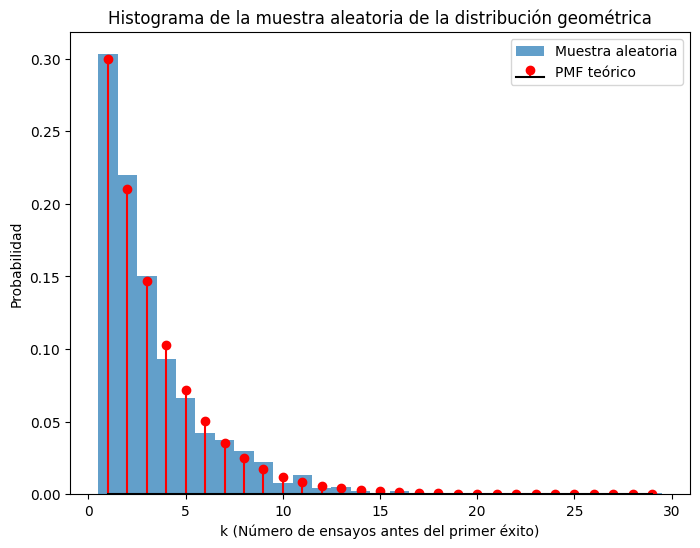

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def geometric_pmf(k, p):
    return (1 - p)**(k-1) * p

def geometric_cdf(k, p):
    return 1 - (1 - p)**k

def inverse_transform_sampling_geometric(size, p):
    u = np.random.rand(size)
    x = np.floor(np.log(1 - u) / np.log(1 - p)) + 1
    return x.astype(int)

p = 0.3

sample_size = 1000
sample = inverse_transform_sampling_geometric(sample_size, p)

k_values = np.arange(1, np.max(sample) + 1)
pmf_values = geometric_pmf(k_values, p)

plt.figure(figsize=(8, 6))
plt.hist(sample, bins=np.arange(0.5, np.max(sample) + 1.5, 1), density=True, alpha=0.7, label='Muestra aleatoria')
plt.stem(k_values, pmf_values, linefmt='r-', markerfmt='ro', basefmt='k-', label='PMF teórico')
plt.xlabel('k (Número de ensayos antes del primer éxito)')
plt.ylabel('Probabilidad')
plt.title('Histograma de la muestra aleatoria de la distribución geométrica')
plt.legend()
plt.show()


### Task 2

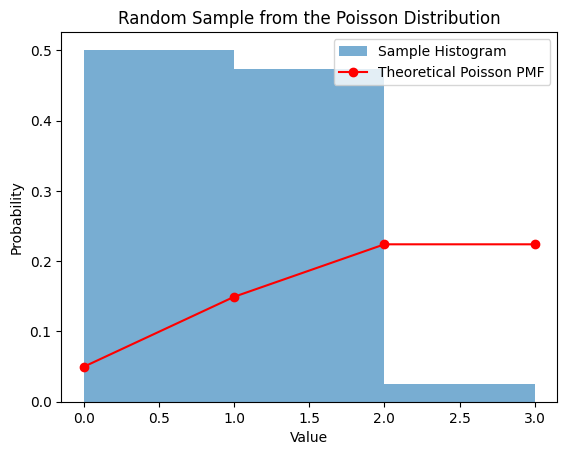

In [47]:
def poissonPmf(k, lambd):
    return np.exp(-lambd) * (lambd ** k) / np.math.factorial(k)

lambd = 3

def exponentialPmf(x, lambdP):
    return lambdP * np.exp(-lambdP * x)

lambdP = 3
C = lambd / lambdP

def generatePoissonSample(n):
    samples = []
    while len(samples) < n:
        x = np.random.exponential(1 / lambdP)
        u = np.random.uniform(0, C * exponentialPmf(x, lambdP))
        if u <= poissonPmf(int(x), lambd):
            samples.append(int(x))
    return samples

sampleSize = 1000
sample = generatePoissonSample(sampleSize)

plt.hist(sample, bins=range(0, max(sample)+1), density=True, alpha=0.6, label='Sample Histogram')
xValues = np.arange(0, max(sample)+1)

poissonPmfValues = []
for x in xValues:
    poissonPmfValues.append(poissonPmf(x, lambd))

plt.plot(xValues, poissonPmfValues, 'ro-', label='Theoretical Poisson PMF')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.title('Random Sample from the Poisson Distribution')
plt.show()


### Task 3

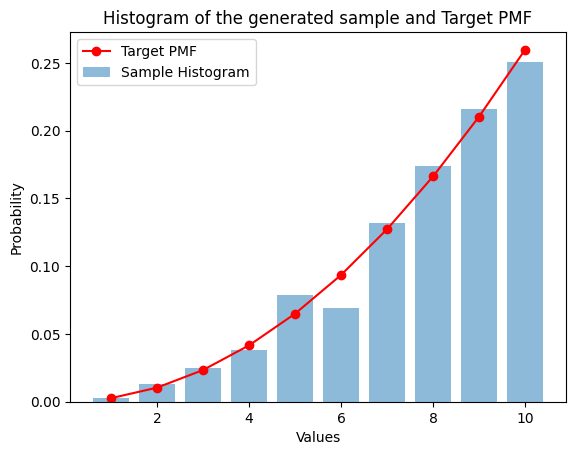

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def targetPmf(x):
    return (x ** 2) / 55

def proposalPmf(x):
    return 1 / 10  

C = max(targetPmf(x) / proposalPmf(x) for x in range(1, 11))

def acceptanceRejectionSampling(size):
    samples = []
    while len(samples) < size:
        x = np.random.randint(1, 11)
        u = np.random.uniform(0, 1)
        if u <= targetPmf(x) / (C * proposalPmf(x)):
            samples.append(x)
    return samples

sampleSize = 1000
randomSample = acceptanceRejectionSampling(sampleSize)

xValues = np.arange(1, 11)
targetPmfValues = np.array([targetPmf(x) for x in xValues])
normalizedTargetPmfValues = targetPmfValues / np.sum(targetPmfValues)
histogramValues, _ = np.histogram(randomSample, bins=np.arange(1, 12), density=True)

plt.bar(xValues, histogramValues, alpha=0.5, label='Sample Histogram')
plt.plot(xValues, normalizedTargetPmfValues, 'ro-', label='Target PMF')
plt.xlabel('Values')
plt.ylabel('Probability')
plt.legend()
plt.title('Histogram of the generated sample and Target PMF')
plt.show()
